# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('Course Time Bailey Korfhage.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
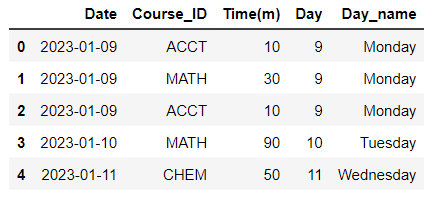

In [3]:
df.head()

,initial,date,course,time,summary
0,BK,1/9/2023,ECON-351-01,15,syllabus
1,BK,1/9/2023,BUSA-301-01,62,read
2,BK,1/9/2023,ECON-351-01,21,read
3,BK,1/9/2023,ACCT-212-01,36,read
4,BK,1/10/2023,ACCT-212-01,9,syllabus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   initial  41 non-null     object
 1   date     41 non-null     object
 2   course   41 non-null     object
 3   time     41 non-null     int64 
 4   summary  41 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


In [5]:
df.columns

Index(['initial', 'date', 'course', 'time', 'summary'], dtype='object')

In [6]:
df.tail()

,initial,date,course,time,summary
36,BK,2/9/2023,ACCT-212-01,35,read
37,BK,2/12/2023,DS-160-01,73,assignment
38,BK,2/12/2023,DS-160-01,49,assignment
39,BK,2/13/2023,DS-160-01,10,assignment
40,BK,2/13/2023,ECON-351-01,41,project


In [7]:
# Is there any column you want to drop? If yes which column and why?
df.drop("initial",axis=1,inplace=True)
df.drop("summary",axis=1,inplace=True)
df.head()
# It would be smart to drop the initial column as it is the same value and doesn't have much substance.
# Summary can also be dropped due to lack of necessary analysis

,date,course,time
0,1/9/2023,ECON-351-01,15
1,1/9/2023,BUSA-301-01,62
2,1/9/2023,ECON-351-01,21
3,1/9/2023,ACCT-212-01,36
4,1/10/2023,ACCT-212-01,9


In [8]:
# Convert the date column to datetime
df['date']=pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    41 non-null     datetime64[ns]
 1   course  41 non-null     object        
 2   time    41 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
# Calculate the day of the month and create a new column named 'Day'
df['Day'] = df['date'].dt.day

In [11]:
df.head()

,date,course,time,Day
0,2023-01-09,ECON-351-01,15,9
1,2023-01-09,BUSA-301-01,62,9
2,2023-01-09,ECON-351-01,21,9
3,2023-01-09,ACCT-212-01,36,9
4,2023-01-10,ACCT-212-01,9,10


In [12]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name'] = df['date'].dt.day_name()

In [13]:
df.head()

,date,course,time,Day,Day_name
0,2023-01-09,ECON-351-01,15,9,Monday
1,2023-01-09,BUSA-301-01,62,9,Monday
2,2023-01-09,ECON-351-01,21,9,Monday
3,2023-01-09,ACCT-212-01,36,9,Monday
4,2023-01-10,ACCT-212-01,9,10,Tuesday


In [14]:
# Renaming the columns

df.rename(columns={'date':'Date', 'course':'Course_ID','time':'Time(m)'}, inplace=True)

In [15]:
df.head()

,Date,Course_ID,Time(m),Day,Day_name
0,2023-01-09,ECON-351-01,15,9,Monday
1,2023-01-09,BUSA-301-01,62,9,Monday
2,2023-01-09,ECON-351-01,21,9,Monday
3,2023-01-09,ACCT-212-01,36,9,Monday
4,2023-01-10,ACCT-212-01,9,10,Tuesday


### Answer the questions

In [16]:
# What is the average time you have spend for learning?

time_learning=df['Time(m)'].mean()
print('I have spent an average of about',round(time_learning,2), 'minutes learning.')

I have spent an average of about 42.39 minutes learning.


In [17]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[df['Time(m)']>42.39]

,Date,Course_ID,Time(m),Day,Day_name
1,2023-01-09,BUSA-301-01,62,9,Monday
5,2023-01-10,HIST-117-ON,158,10,Tuesday
11,2023-01-17,HIST-117-ON,91,17,Tuesday
12,2023-01-18,BUSA-301-01,44,18,Wednesday
15,2023-01-19,ECON-351-01,64,19,Thursday
16,2023-01-22,HIST-117-ON,88,22,Sunday
17,2023-01-23,HIST-117-ON,79,23,Monday
22,2023-01-26,HIST-117-ON,195,26,Thursday
23,2023-01-30,DS-160-01,67,30,Monday
28,2023-02-04,ACCT-212-01,46,4,Saturday


In [18]:
# Which course you have spent the maximum time to prepare?
df.groupby('Course_ID').sum()

#I have spent the most time on my history course.

,Time(m),Day
Course_ID,,
ACCT-212-01,236,92
BUSA-301-01,217,106
DS-160-01,315,139
ECON-351-01,271,199
HIST-117-ON,699,107


In [19]:
# Which day of the week you sepent most of the time?
frequentday=df['Day_name'].mode()[0]
print('I worked the most on',frequentday)

I worked the most on Monday


### Investigate the distribution of Time, adding the mean. How the data distributed?
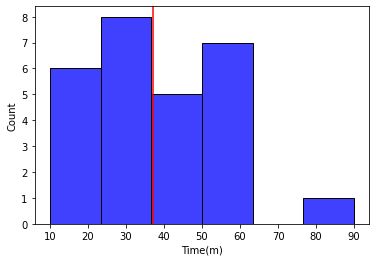

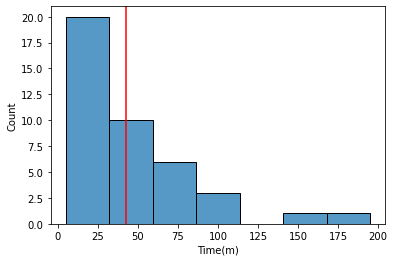

In [20]:
sns.histplot(x='Time(m)',data=df)
mean=df['Time(m)'].mean()
plt.axvline(mean,color='red')
plt.show()

The data is right skewed with some outliers beyond 100 minutes of learning

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
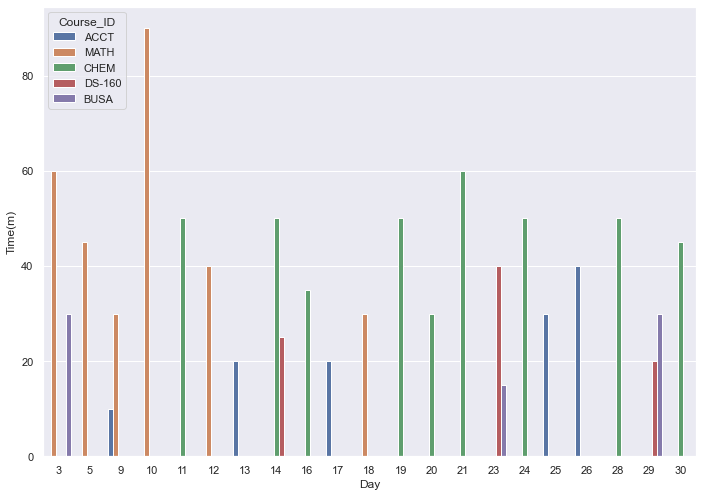

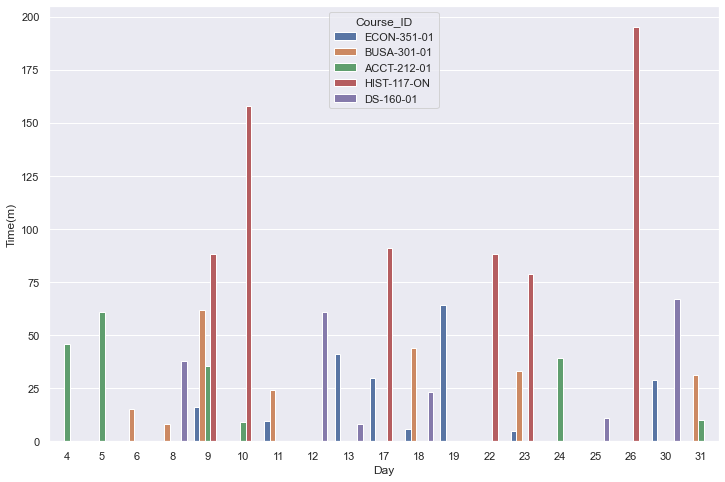

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot=sns.barplot(x='Day',y='Time(m)',data=df, ci=False, hue='Course_ID')

There are noticeable gaps between certain periods (such as 11-12, 19-22): these were most likely weekends. The distribution is mostly an even skew with many outliers from my history class because it is an all online course, so all work was outside of class. 

### Investigate the measure of dispersion (table and plot) of time column.
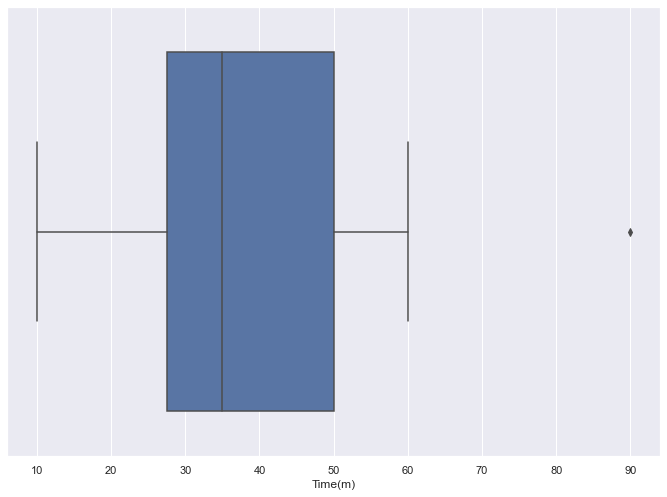

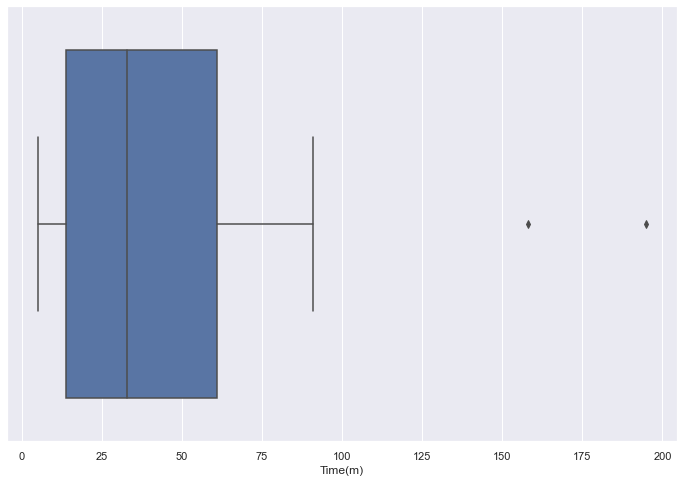

In [22]:
box_plot=sns.boxplot(x=df['Time(m)'])

There are two outliers, with the normal range between about 5 and 90. 

### Investigate the the distribution of time by Day_name
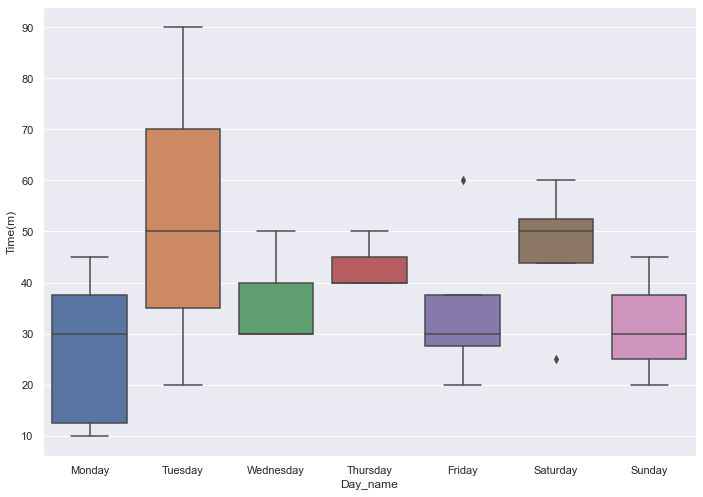

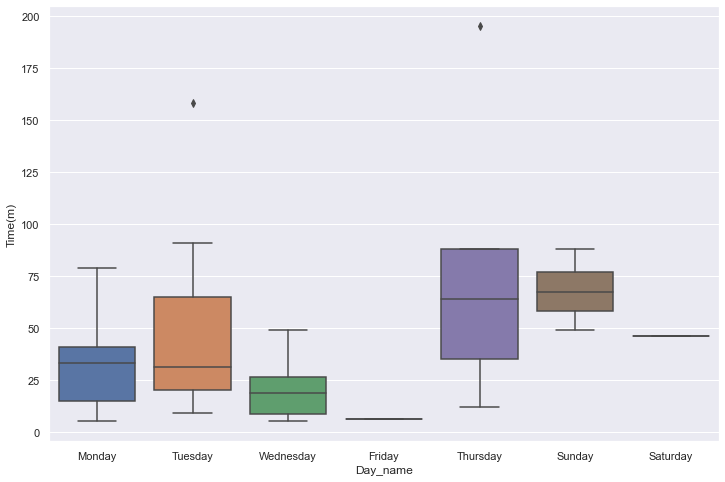

In [23]:
box_plot=sns.boxplot(x=df['Day_name'],y=df['Time(m)'])

It appears that most of the time was dedicated to studying on Tuesday and Thursday with very little homework done on Saturday or Friday

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
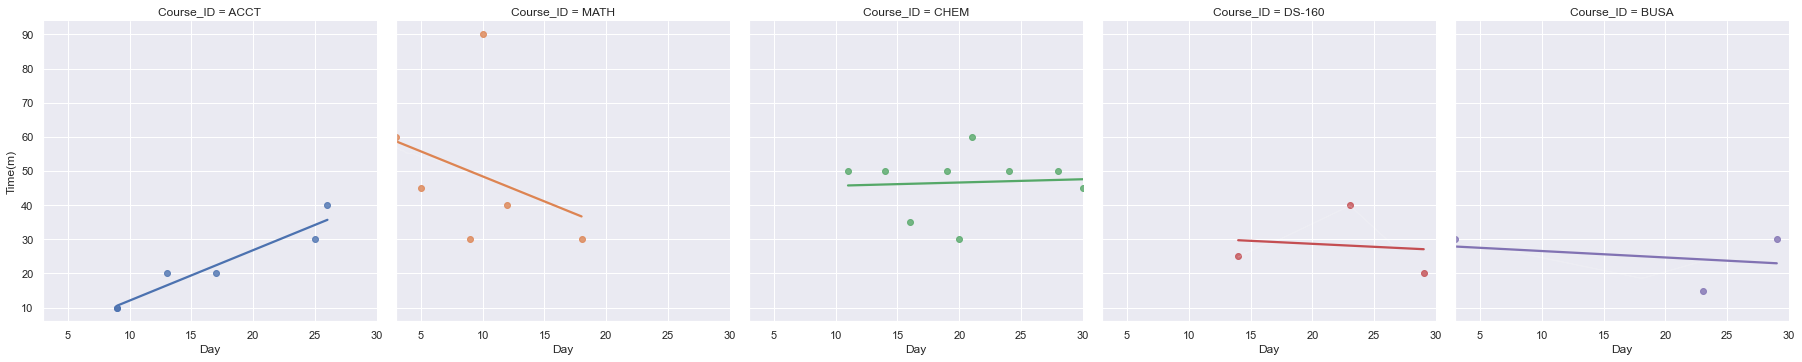

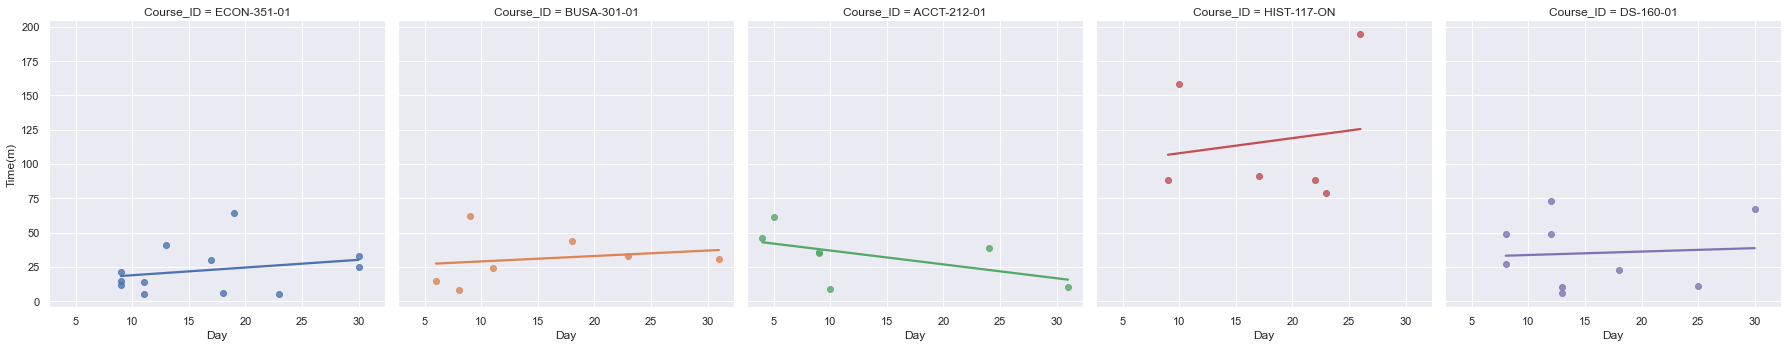

In [24]:
lmplot=sns.lmplot(x='Day', y='Time(m)',data=df, hue='Course_ID',ci=False,col='Course_ID')

### Create a pair plot of Day and Time and add course id as hue
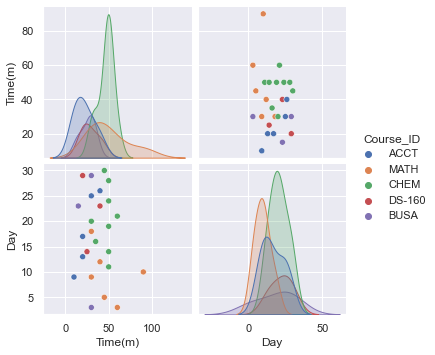

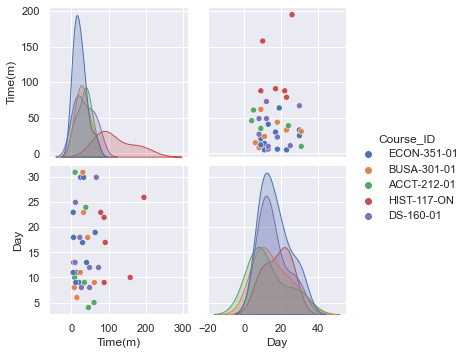

In [27]:
pair_plot=sns.pairplot(df,hue='Course_ID')

### Display the Heatmap and comment on your findings
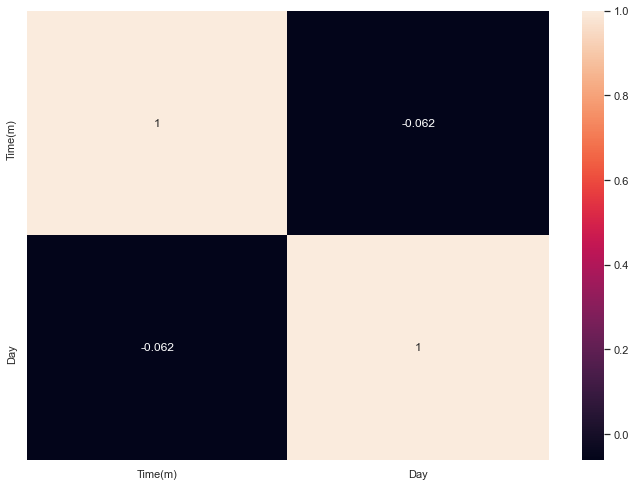

          Time(m)       Day
Time(m)  1.000000  0.099566
Day      0.099566  1.000000


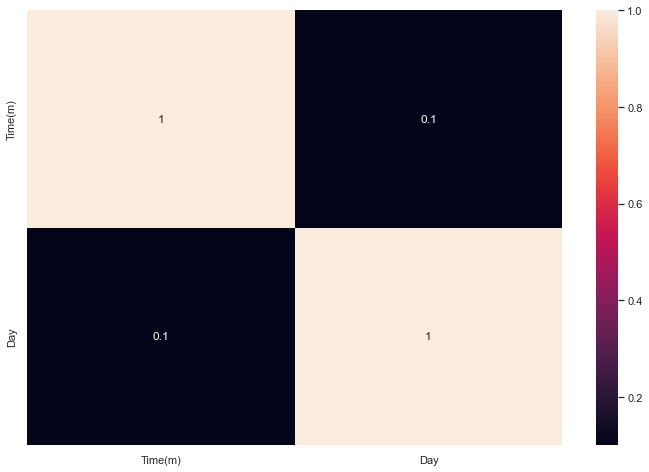

In [28]:
heat_map_corr=df[['Time(m)','Day']].corr(method='pearson')
print(heat_map_corr)
cols=['Time(m)','Day']
heat_map=sns.heatmap(heat_map_corr,annot=True,xticklabels=cols,yticklabels=cols)

The date of the month has little if any correlation with the time spent learning. This means that as the semester went on, there was no respective increase or decrease in time spent on homework. 

### Overall conclusion

In conclusion, the data was right skewed with two main outliers. These outliers can be explained by the fact that my history course is completely online so all of my work was done, technically, outside the classroom. In addition, I rarely did homework on the weekends, so there were a few days out of the month without any data. Many of my professors were also generous by releasing the class early or allowed us to have work days for our homework. In my opinion, the mean is most likely closer to 30 or 35 minutes. Also, the data is skewed because the Day column is not taking into account the time between January and the first two weeks of February when the day number overlapped. 